In [32]:
#import libraries 
import pandas as pd
import numpy as np
import scipy
import os
from math import ceil
import matplotlib.pyplot as plt
import seaborn as sns
# _______________________________________
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv(r'C:\Users\hirom\Documents\GitHub\Data_Visualization_Projects\Data_Visualization_Projects\Project 1\Final_Dataset.csv')

In [9]:
df.head(3)

,iso_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,country_region,new_cases_per_million,new_cases,new_deaths,new_deaths_per_million,latitude,longitude
0,ARE,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0,United Arab Emirates,0.000,0.0,0.0,0.0,23.424076,53.847818
1,ARE,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0,United Arab Emirates,0.101,1.0,0.0,0.0,23.424076,53.847818
2,ARE,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0,United Arab Emirates,0.000,0.0,0.0,0.0,23.424076,53.847818


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47738 entries, 0 to 47737
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   iso_code                                            47738 non-null  object 
 1   date                                                47738 non-null  object 
 2   retail_and_recreation_percent_change_from_baseline  47738 non-null  float64
 3   grocery_and_pharmacy_percent_change_from_baseline   47738 non-null  float64
 4   parks_percent_change_from_baseline                  47738 non-null  float64
 5   transit_stations_percent_change_from_baseline       47738 non-null  float64
 6   workplaces_percent_change_from_baseline             47738 non-null  float64
 7   residential_percent_change_from_baseline            47738 non-null  float64
 8   country_region                                      47738 non-null  object 


In [28]:
metric = df.iloc[:,0:12].select_dtypes(include = ['float64']).columns.to_list()

## Visual Exploration

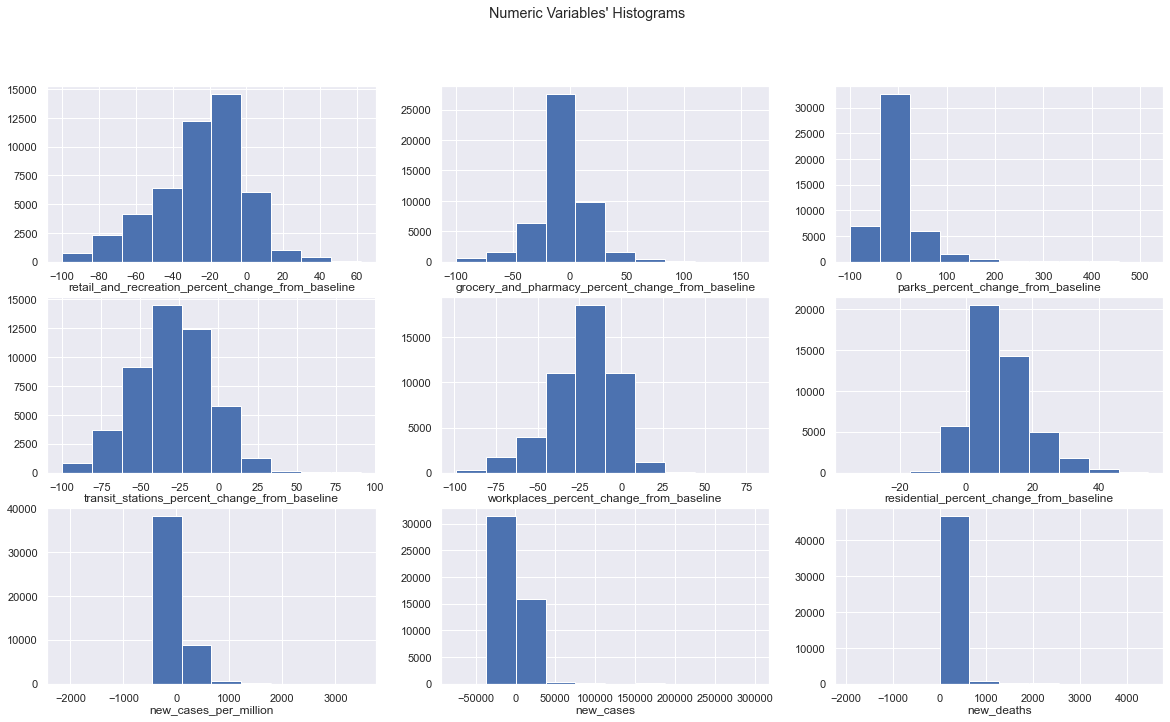

In [29]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(3, ceil(len(metric) / 3), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric): # Notice the zip() function and flatten() method
    ax.hist(df[feat])
    ax.set_title(feat, y=-0.20)
    
# Layout
# Add a centered title to the figure:
#title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

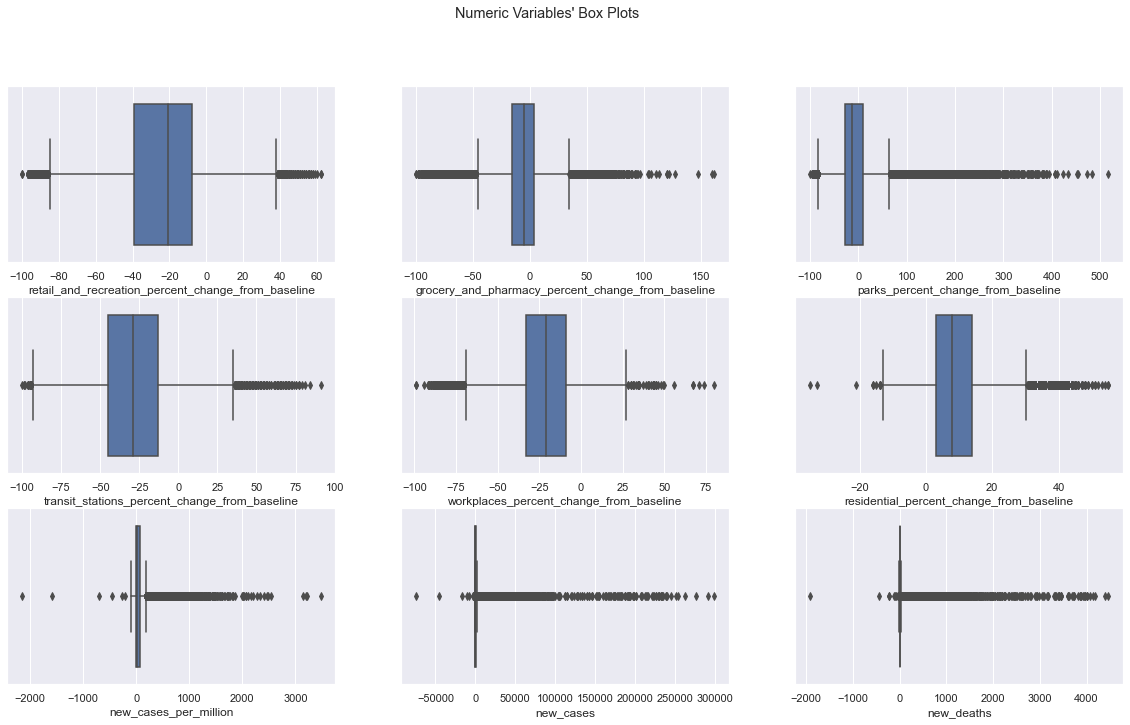

In [34]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, ceil(len(metric) / 3), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric): # Notice the zip() function and flatten() method
    sns.boxplot(df[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

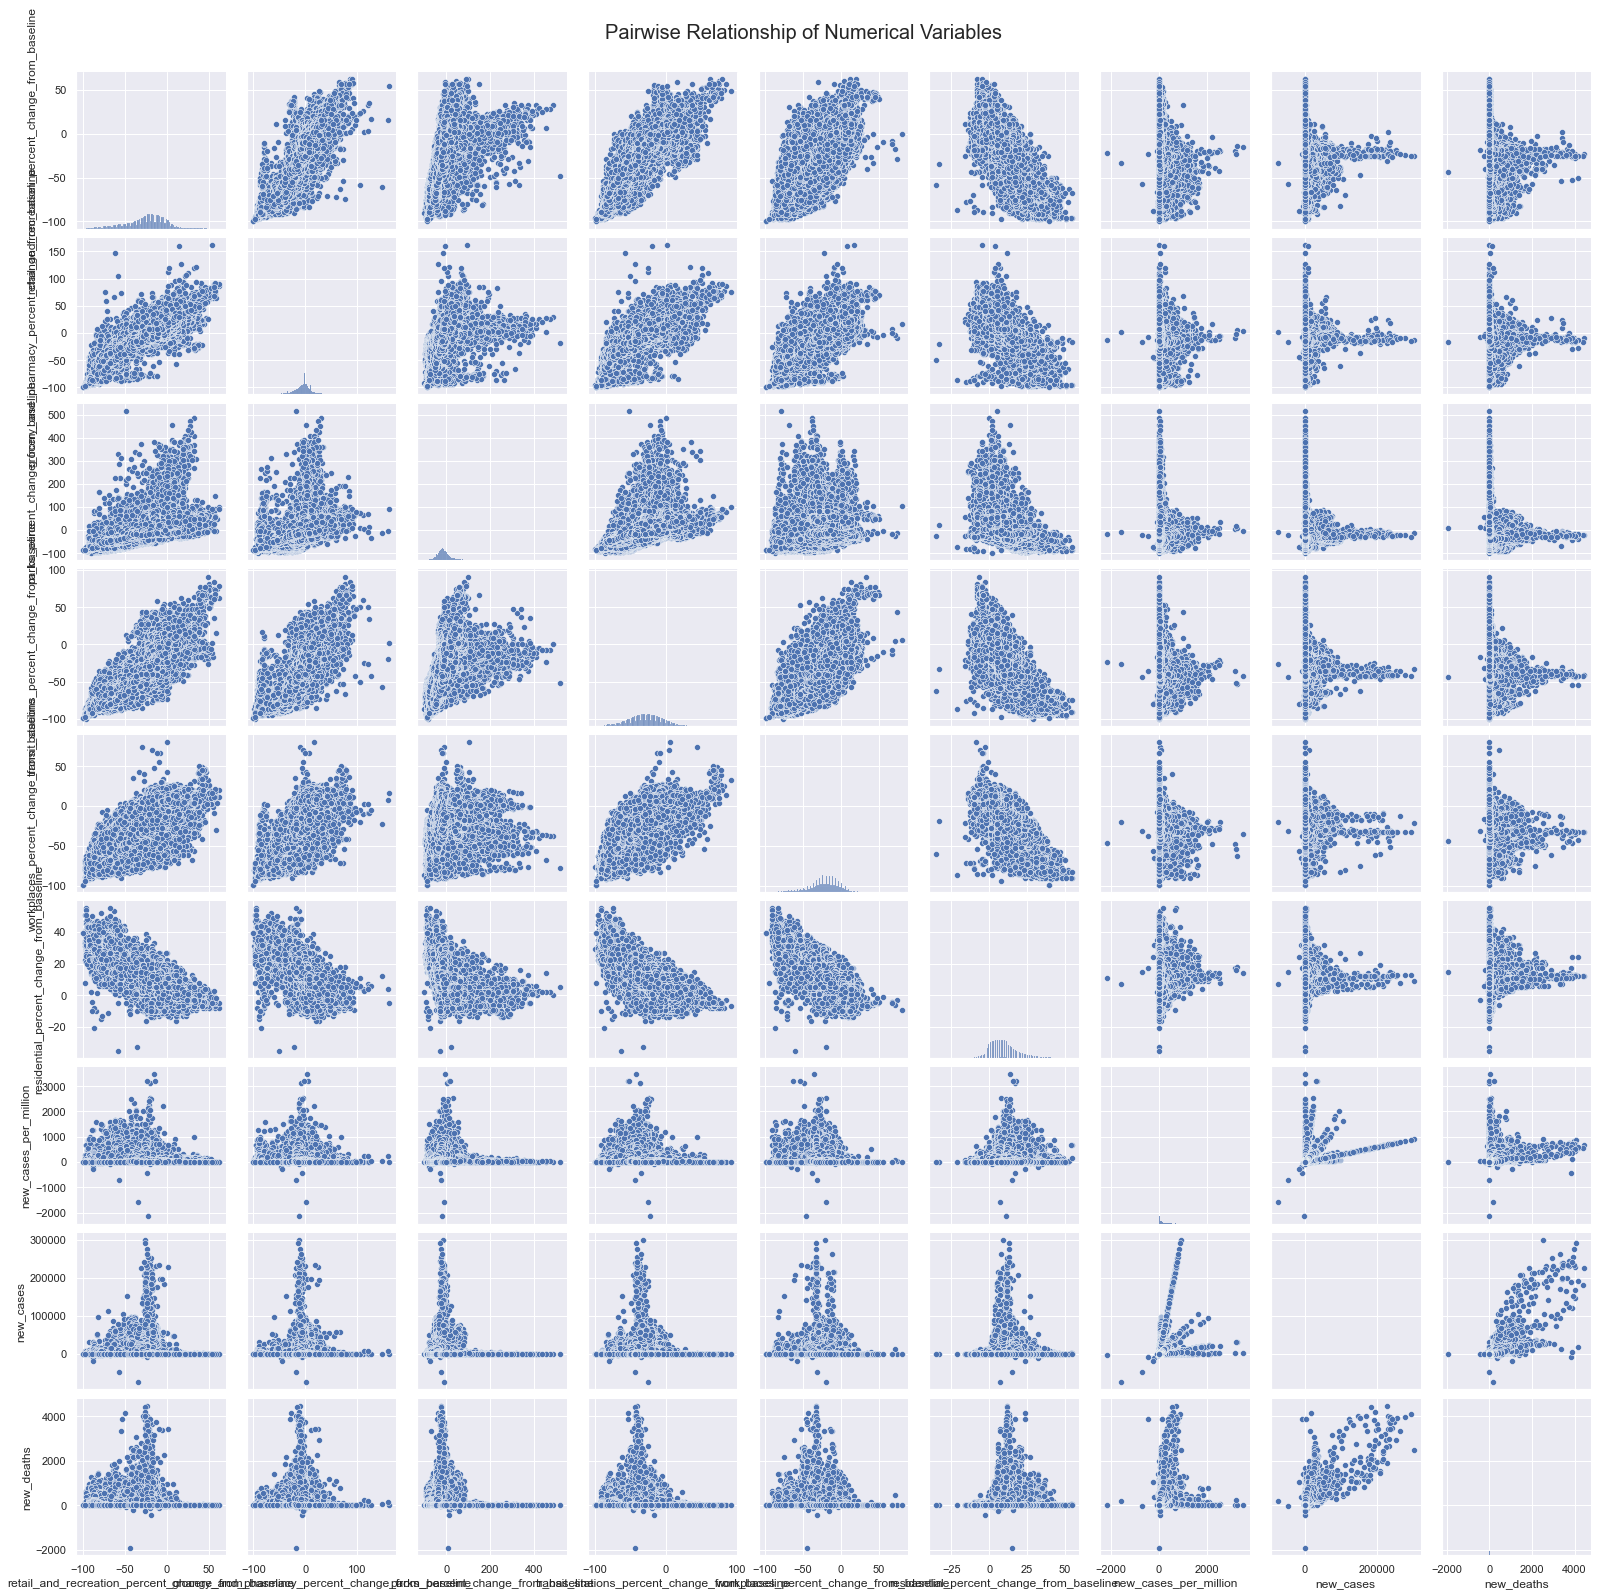

In [35]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(df[metric], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()

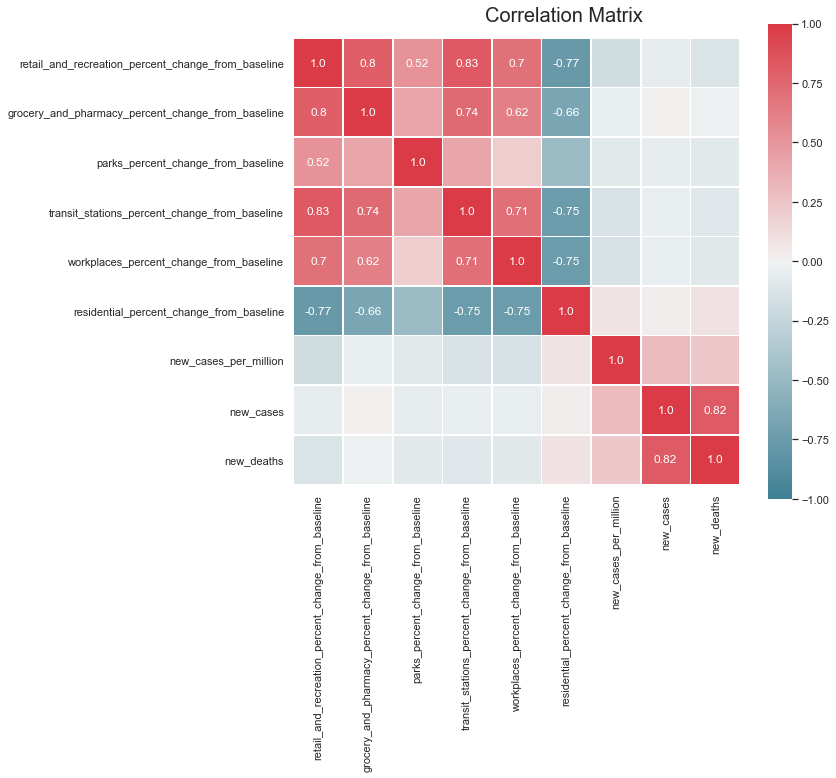

In [36]:
# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(df[metric].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

In [45]:
import urllib.request, json 

with urllib.request.urlopen(geo_path + 'countries.geojson') as url:
    data_geo = json.loads(url.read().decode())

NameError: name 'geo_path' is not defined